#Title - Title: Crime Prediction and Forecasting Using Spatio-Temporal Data

**Description**:
In this notebook, we explore the fascinating realm of crime prediction and forecasting using spatio-temporal data. Leveraging a comprehensive crime dataset, we delve into the core question of whether a person will be arrested or not. Our journey takes us through various machine learning algorithms, offering insights into the predictive power of decision trees and random forests.

**The key highlights of our exploration include:**

**Utilizing Decision Trees:** We harness the potential of decision tree algorithms to create predictive models that aid in determining arrest outcomes. By optimizing the model's hyperparameters, we strive to enhance its accuracy and reliability.

**Harnessing Random Forests:** We extend our predictive capabilities by employing the Random Forest algorithm, a powerful ensemble learning technique. This approach allows us to leverage the collective intelligence of multiple decision trees to make more robust predictions.

**Spatial Insights with K-Means:** To unearth hidden spatial patterns within the data, we apply the K-Means clustering algorithm. This method helps us identify clusters of similar crime occurrences and provides valuable spatial insights.

**Proximity Analysis with PAM:** Utilizing Partitioning Around Medoids (PAM) clustering, we further explore patterns in the data. PAM analysis focuses on identifying central points (medoids) within crime clusters, shedding light on the proximity dynamics of criminal activities.

**Hierarchical Clustering:** We employ hierarchical clustering techniques to uncover the hierarchical structure within the data. This method helps us visualize crime groupings and their relationships in a hierarchical manner.

#Importing Libraries and Dataset Overview

In [ ]:
pip install scikit-learn-extra

In [ ]:
import numpy as np
import timeit
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn_extra.cluster import KMedoids
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
df = pd.read_csv('sample_data/Crimes2022.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12589893,JF109865,01/11/2022 03:00:00 PM,087XX S KINGSTON AVE,1565,SEX OFFENSE,INDECENT SOLICITATION OF A CHILD,RESIDENCE,False,True,...,7.0,46,17,1194660.0,1847481.0,2022,09/14/2023 03:41:59 PM,41.736409,-87.562410,"(41.736409029, -87.562410309)"
1,12592454,JF113025,01/14/2022 03:55:00 PM,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,09/14/2023 03:41:59 PM,41.771782,-87.649437,"(41.771782439, -87.649436929)"
2,12601676,JF124024,01/13/2022 04:00:00 PM,031XX W AUGUSTA BLVD,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,36.0,23,17,1155171.0,1906486.0,2022,09/14/2023 03:41:59 PM,41.899206,-87.705506,"(41.899206068, -87.705505587)"
3,12785595,JF346553,08/05/2022 09:00:00 PM,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,09/14/2023 03:41:59 PM,41.763338,-87.597001,"(41.763337967, -87.597001131)"
4,12808281,JF373517,08/14/2022 02:00:00 PM,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,09/14/2023 03:41:59 PM,41.985875,-87.766404,"(41.985875279, -87.766403857)"


In [ ]:
print('Dataset length before drop null values')
len(df)

Dataset length before drop null values


239028

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239028 entries, 0 to 239027
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239028 non-null  int64  
 1   Case Number           239028 non-null  object 
 2   Date                  239028 non-null  object 
 3   Block                 239028 non-null  object 
 4   IUCR                  239028 non-null  object 
 5   Primary Type          239028 non-null  object 
 6   Description           239028 non-null  object 
 7   Location Description  238150 non-null  object 
 8   Arrest                239028 non-null  bool   
 9   Domestic              239028 non-null  bool   
 10  Beat                  239028 non-null  int64  
 11  District              239028 non-null  int64  
 12  Ward                  239018 non-null  float64
 13  Community Area        239028 non-null  int64  
 14  FBI Code              239028 non-null  object 
 15  

In [ ]:
df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     878
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            5995
Y Coordinate            5995
Year                       0
Updated On                 0
Latitude                5995
Longitude               5995
Location                5995
dtype: int64

In [ ]:
#Unique crime types
df['Primary Type'].unique()

array(['SEX OFFENSE', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'WEAPONS VIOLATION', 'BATTERY', 'THEFT', 'CRIMINAL SEXUAL ASSAULT',
       'ROBBERY', 'BURGLARY', 'DECEPTIVE PRACTICE', 'ASSAULT',
       'MOTOR VEHICLE THEFT', 'NARCOTICS', 'CRIMINAL DAMAGE',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'STALKING', 'ARSON',
       'INTIMIDATION', 'OBSCENITY', 'HUMAN TRAFFICKING',
       'PUBLIC PEACE VIOLATION', 'PROSTITUTION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'LIQUOR LAW VIOLATION',
       'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION',
       'OTHER NARCOTIC VIOLATION', 'GAMBLING', 'NON-CRIMINAL',
       'PUBLIC INDECENCY'], dtype=object)

# Data Visualization

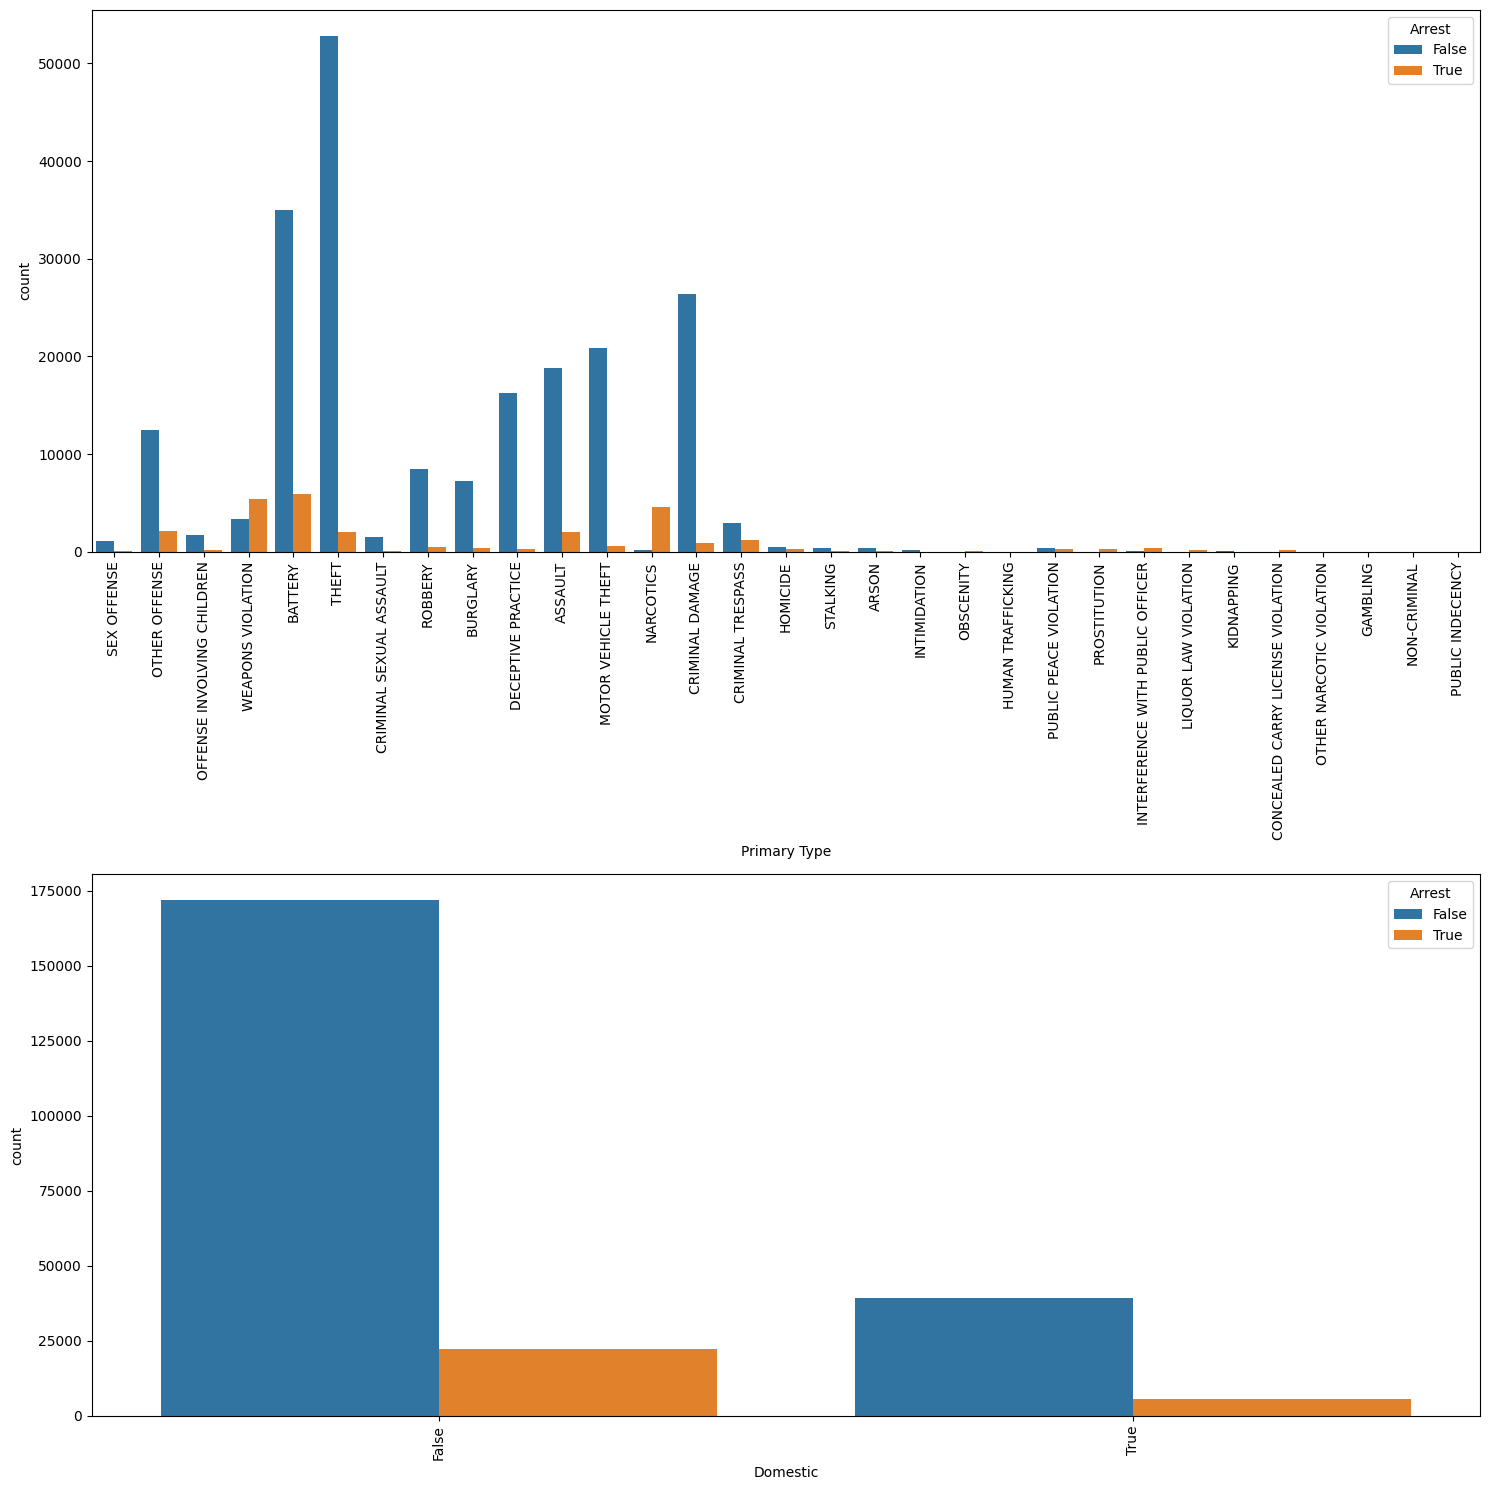

In [ ]:
# list of categorical variables to plot
cat_vars = ['Primary Type','Domestic']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Arrest', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

# Data Preprocessing

In [ ]:
df.dropna(inplace=True)

df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [ ]:
print('Dataset length after removing null values')
len(df)

Dataset length after removing null values


232452

In [ ]:
drop_colmns = ['Case Number', 'X Coordinate', 'Y Coordinate', 'ID', 'Updated On', 'FBI Code', 'Ward', 'IUCR', 'Ward', 'Community Area', 'Block', 'Location']
df_dropped = df.drop(columns=drop_colmns)

In [ ]:
df_dropped.dtypes

Date                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Year                      int64
Latitude                float64
Longitude               float64
dtype: object

In [ ]:
#Convert date to match format for Pandas and create an index using the 'Date' feature

df_dropped['Date'] = pd.to_datetime(df_dropped['Date'], format='%m/%d/%Y %I:%M:%S %p')
df_dropped.index = pd.DatetimeIndex(df_dropped['Date'])

#Add the features of 'Month' and 'Weekday' using the date index

df_dropped['Month'] = df_dropped.index.month.astype(int)
df_dropped['Weekday'] = df_dropped.index.weekday.astype(int)
df_dropped.head(10)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Month,Weekday
Date,,,,,,,,,,,,,
2022-01-11 15:00:00,2022-01-11 15:00:00,SEX OFFENSE,INDECENT SOLICITATION OF A CHILD,RESIDENCE,False,True,423,4,2022,41.736409,-87.562410,1,1
2022-01-14 15:55:00,2022-01-14 15:55:00,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7,2022,41.771782,-87.649437,1,4
2022-01-13 16:00:00,2022-01-13 16:00:00,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,1211,12,2022,41.899206,-87.705506,1,3
2022-08-05 21:00:00,2022-08-05 21:00:00,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,2022,41.763338,-87.597001,8,4
2022-08-14 14:00:00,2022-08-14 14:00:00,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,2022,41.985875,-87.766404,8,6
2022-11-10 03:47:00,2022-11-10 03:47:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,733,7,2022,41.762615,-87.652840,11,3
2022-02-19 10:36:00,2022-02-19 10:36:00,BATTERY,DOMESTIC BATTERY SIMPLE,HOSPITAL BUILDING / GROUNDS,True,True,1211,12,2022,41.900506,-87.699285,2,5
2022-03-13 05:15:00,2022-03-13 05:15:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2431,24,2022,42.005522,-87.662241,3,6
2022-04-10 21:38:00,2022-04-10 21:38:00,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,WAREHOUSE,True,True,1822,18,2022,41.901497,-87.652407,4,6


In [ ]:
#Drop the 'Date' feature
df_dropped.drop(columns=['Date'], axis=1, inplace=True, errors='ignore')
df_dropped2 = df_dropped
df_dropped.head(10)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Month,Weekday
Date,,,,,,,,,,,,
2022-01-11 15:00:00,SEX OFFENSE,INDECENT SOLICITATION OF A CHILD,RESIDENCE,False,True,423,4,2022,41.736409,-87.562410,1,1
2022-01-14 15:55:00,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7,2022,41.771782,-87.649437,1,4
2022-01-13 16:00:00,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,1211,12,2022,41.899206,-87.705506,1,3
2022-08-05 21:00:00,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,2022,41.763338,-87.597001,8,4
2022-08-14 14:00:00,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,2022,41.985875,-87.766404,8,6
2022-11-10 03:47:00,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,733,7,2022,41.762615,-87.652840,11,3
2022-02-19 10:36:00,BATTERY,DOMESTIC BATTERY SIMPLE,HOSPITAL BUILDING / GROUNDS,True,True,1211,12,2022,41.900506,-87.699285,2,5
2022-03-13 05:15:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,2431,24,2022,42.005522,-87.662241,3,6
2022-04-10 21:38:00,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,WAREHOUSE,True,True,1822,18,2022,41.901497,-87.652407,4,6


In [ ]:
#Display the value counts for the feature of 'Year'

value_counts = df_dropped['Year'].value_counts()
print(value_counts)

#Drop the 'Year' feature value of 2017

df_dropped.drop(df_dropped[df_dropped['Year'] == 2017].index, inplace=True, errors='ignore')
value_counts = df_dropped['Year'].value_counts()
print(value_counts)

#Display the value counts for feature of 'Primary Type'

value_counts = df_dropped['Primary Type'].value_counts()
print(value_counts)

#Drop the 'Primary Type' categories that have a value count less than 1000"""

value_counts = df_dropped['Primary Type'].value_counts()
remove_values = value_counts[value_counts < 1000].index
crimes_final = df_dropped[~df_dropped['Primary Type'].isin(remove_values)]

2022    232452
Name: Year, dtype: int64
2022    232452
Name: Year, dtype: int64
THEFT                                53137
BATTERY                              40687
CRIMINAL DAMAGE                      26912
MOTOR VEHICLE THEFT                  21247
ASSAULT                              20692
OTHER OFFENSE                        14221
DECEPTIVE PRACTICE                   14194
ROBBERY                               8944
WEAPONS VIOLATION                     8696
BURGLARY                              7512
CRIMINAL TRESPASS                     4189
NARCOTICS                             3966
OFFENSE INVOLVING CHILDREN            1766
CRIMINAL SEXUAL ASSAULT               1472
SEX OFFENSE                           1129
HOMICIDE                               726
PUBLIC PEACE VIOLATION                 704
STALKING                               420
ARSON                                  419
INTERFERENCE WITH PUBLIC OFFICER       391
PROSTITUTION                           283
LIQUOR LAW VIOLAT

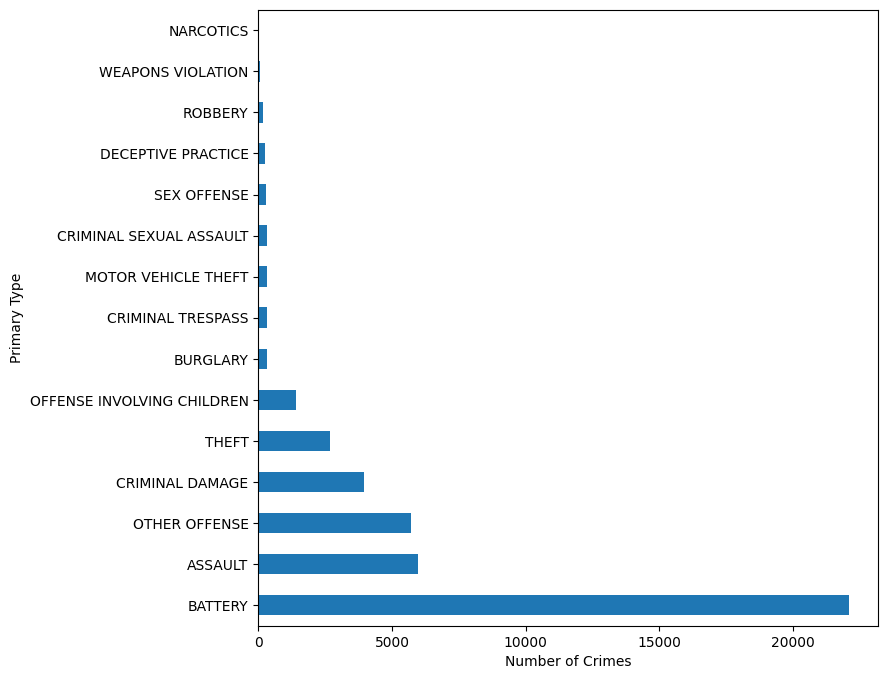

In [ ]:
domestic = crimes_final[crimes_final['Domestic'] == True]

plt.figure(figsize=(8, 8))
domestic.groupby([domestic['Primary Type']]).size().sort_values(ascending=False)[:15].plot(kind='barh')
plt.xlabel('Number of Crimes')
plt.ylabel('Primary Type')
plt.show()

In [ ]:
# Encoding all remaining columns:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Primary_Type_array = le.fit_transform(crimes_final['Primary Type'])
Description_array = le.fit_transform(crimes_final['Description'])
Location_Description_array = le.fit_transform(crimes_final['Location Description'])
Arrest_array = le.fit_transform(crimes_final['Arrest'])
Domestic_array = le.fit_transform(crimes_final['Domestic'])
Year_array = le.fit_transform(crimes_final['Year'])

crimes_final = crimes_final.drop(columns=['Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic'])
crimes_final = crimes_final.drop(columns=['Year'])
crimes_final['Primary Type'] = Primary_Type_array
crimes_final['Description'] = Description_array
crimes_final['Location Description'] = Location_Description_array
crimes_final['Arrest'] = Arrest_array
crimes_final['Domestic'] = Domestic_array
crimes_final['Year'] = Year_array

In [ ]:
crimes_final

,Beat,District,Latitude,Longitude,Month,Weekday,Primary Type,Description,Location Description,Arrest,Domestic,Year
Date,,,,,,,,,,,,
2022-01-11 15:00:00,423,4,41.736409,-87.562410,1,1,12,114,79,0,1,0
2022-01-14 15:55:00,724,7,41.771782,-87.649437,1,4,10,107,79,0,1,0
2022-01-13 16:00:00,1211,12,41.899206,-87.705506,1,3,9,13,79,0,1,0
2022-08-05 21:00:00,324,3,41.763338,-87.597001,8,4,12,175,17,1,0,0
2022-08-14 14:00:00,1621,16,41.985875,-87.766404,8,6,12,12,79,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16 00:00:00,935,9,41.797159,-87.633068,12,4,9,32,17,1,1,0
2022-02-04 00:01:00,1422,14,41.913079,-87.710161,2,4,9,13,79,1,1,0
2022-12-01 00:00:00,312,3,41.776019,-87.615520,12,3,1,89,79,0,1,0


In [ ]:
crimes_final.head()

,Beat,District,Latitude,Longitude,Month,Weekday,Primary Type,Description,Location Description,Arrest,Domestic,Year
Date,,,,,,,,,,,,
2022-01-11 15:00:00,423,4,41.736409,-87.562410,1,1,12,114,79,0,1,0
2022-01-14 15:55:00,724,7,41.771782,-87.649437,1,4,10,107,79,0,1,0
2022-01-13 16:00:00,1211,12,41.899206,-87.705506,1,3,9,13,79,0,1,0
2022-08-05 21:00:00,324,3,41.763338,-87.597001,8,4,12,175,17,1,0,0
2022-08-14 14:00:00,1621,16,41.985875,-87.766404,8,6,12,12,79,0,0,0


# Classification Model Development

## Decision Tree

In order to classify using decision tree, we need to drop unnecessary columns in the preprocessed dataset.

In [ ]:
drop_colmns = ['Beat', 'Latitude', 'Longitude', 'Description', 'Year', 'District', 'Description']
df_dropped = crimes_final.drop(columns=drop_colmns)

In [ ]:
df_dropped.head()

,Month,Weekday,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2022-01-11 15:00:00,1,1,12,79,0,1
2022-01-14 15:55:00,1,4,10,79,0,1
2022-01-13 16:00:00,1,3,9,79,0,1
2022-08-05 21:00:00,8,4,12,17,1,0
2022-08-14 14:00:00,8,6,12,79,0,0


Here we can see the class inbalace of our dataset.
1.   Not Arrest (False) - 0
2.   Arrest (True) - 1

0    203501
1     25263
Name: Arrest, dtype: int64

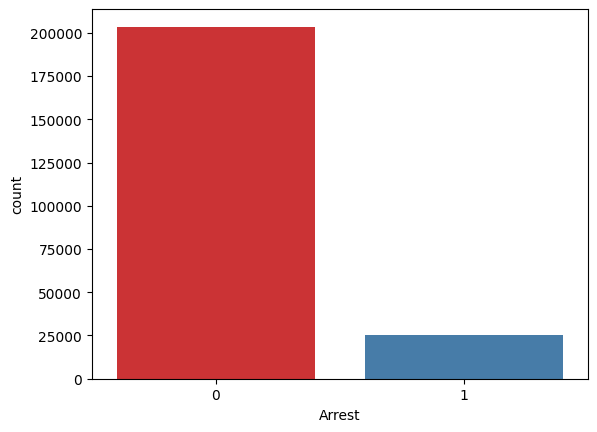

In [ ]:
import seaborn as sns
sns.countplot(x='Arrest', data=crimes_final, palette='Set1')
crimes_final['Arrest'].value_counts()

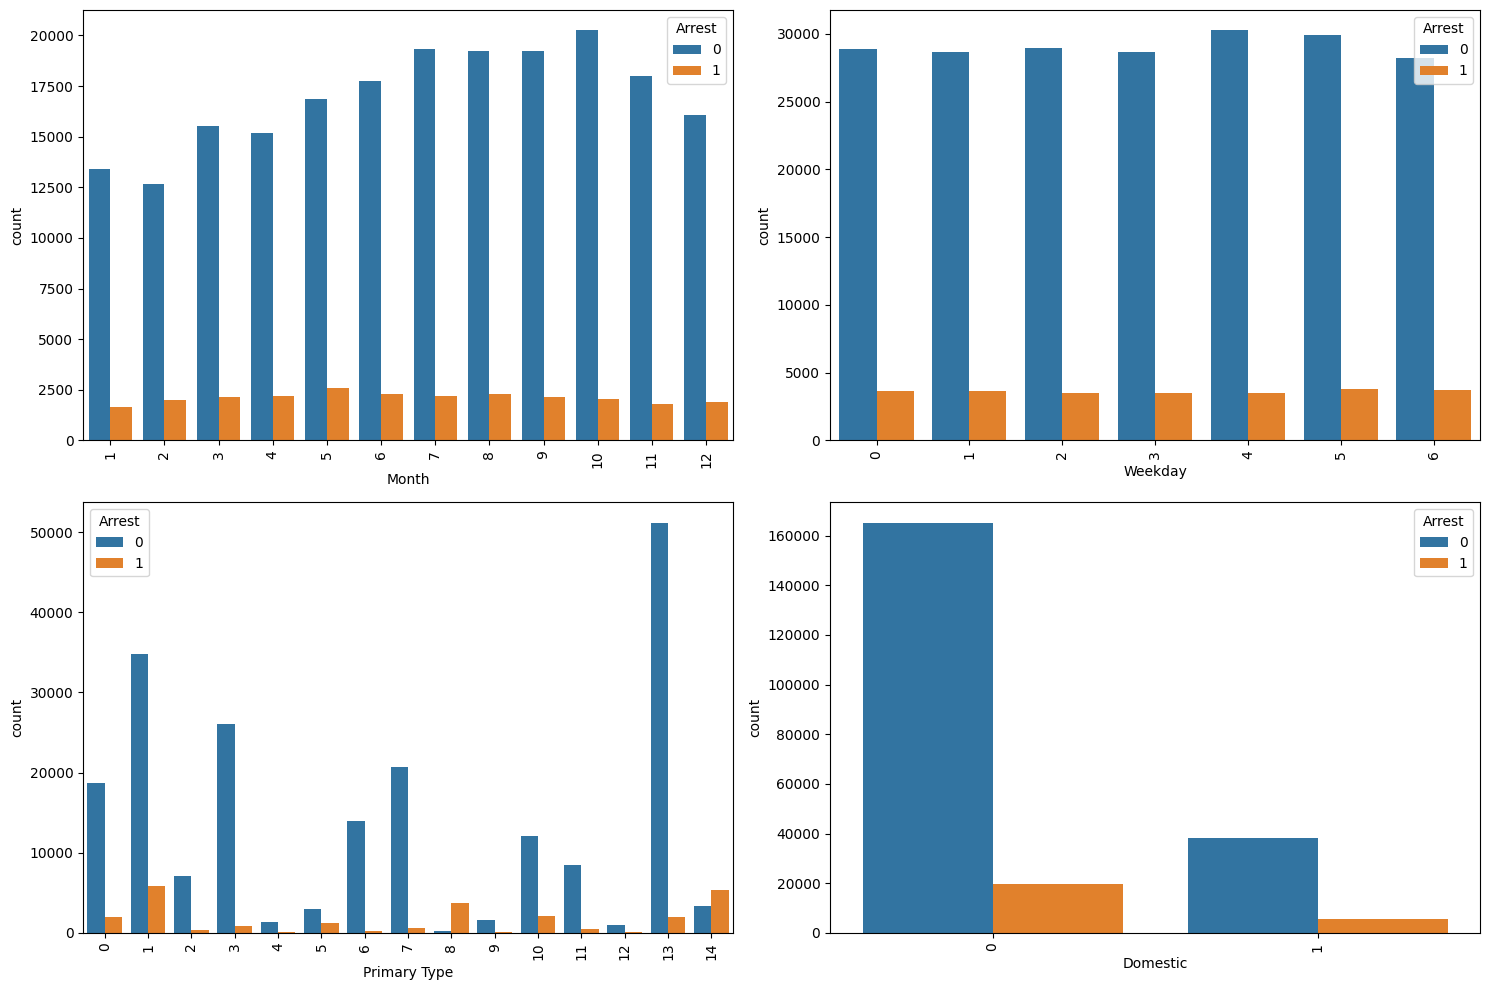

In [ ]:
# list of categorical variables to plot
cat_vars = ['Month',	'Weekday',	'Primary Type',	'Domestic']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Arrest', data=crimes_final, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

In [ ]:
X = df_dropped.drop('Arrest', axis=1)
y = df_dropped['Arrest']

In [ ]:
#test size 30% and train size 70%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

Now we need to identify the best hyperparameters for our decision tree model based on the provided hyperparameter ranges.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [ ]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=7, min_samples_leaf=2, min_samples_split=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=3,
                       random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 91.6 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.9159551216669095
Precision Score :  0.9159551216669095
Recall Score :  0.9159551216669095
Jaccard Score :  0.8449420683351703


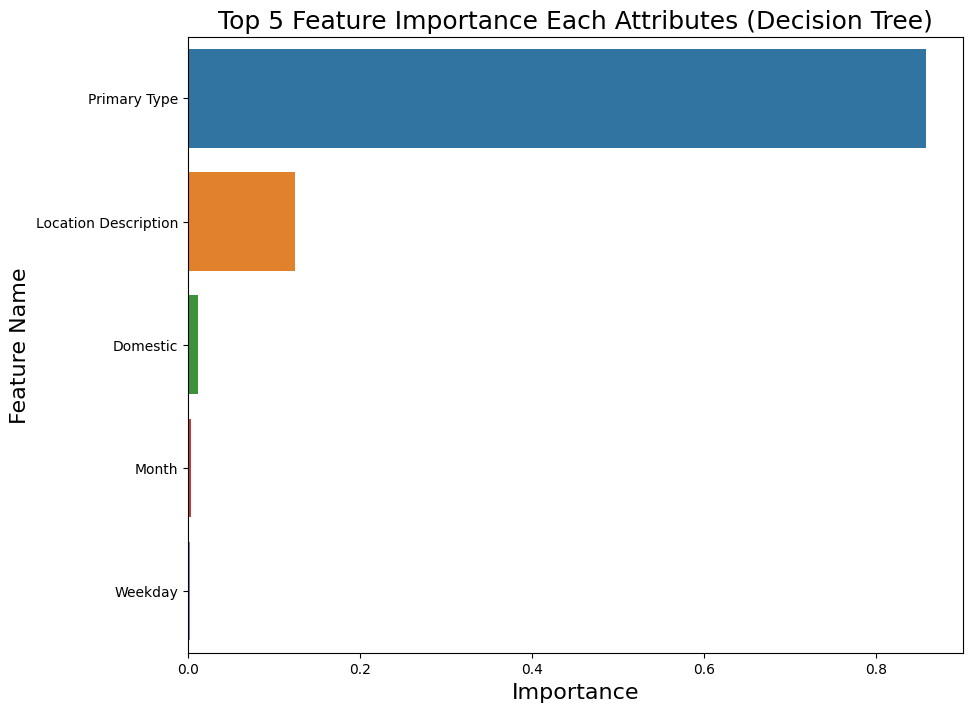

In [ ]:
import seaborn as sns
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 5 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

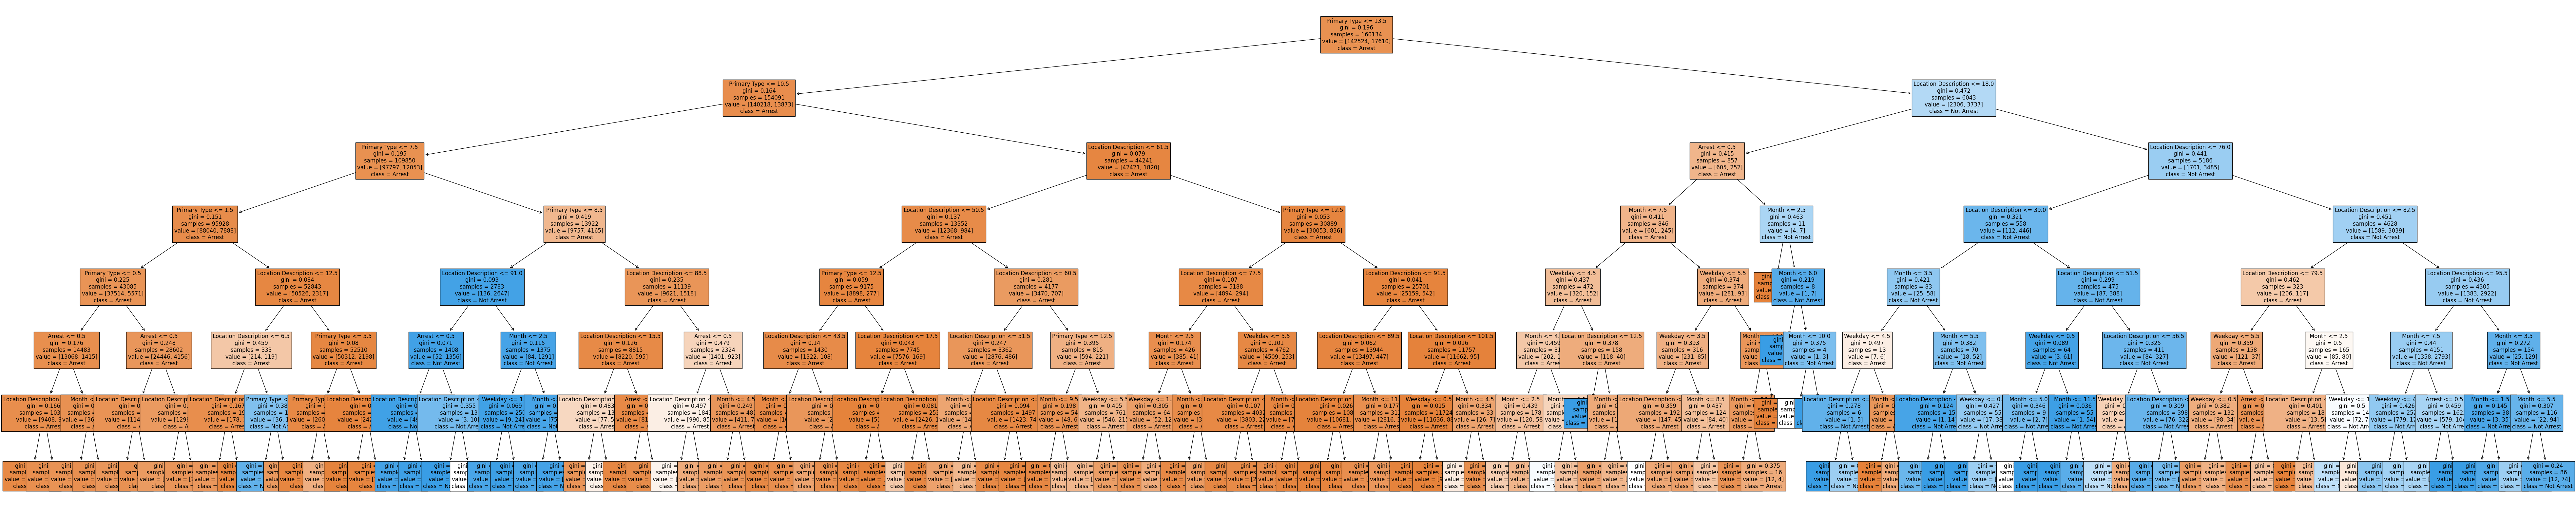

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(100,20))
a = plot_tree(dtree, feature_names=df_dropped.columns, fontsize=12, filled=True,
              class_names=['Arrest', 'Not Arrest'])

Save decision tree as a PDF file.

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

feature_names = ['Month', 'Weekday', 'Primary Type', 'Location Description', 'Domestic']

# Export the decision tree to a Graphviz DOT format
dot_data = export_graphviz(dtree, out_file=None, feature_names=feature_names, class_names=['Arrest', 'Not Arrest'], filled=True, rounded=True)

# Create a Graphviz object from the DOT data
graph = graphviz.Source(dot_data)

# Save the tree as a PDF file
graph.render("decision_tree")

'decision_tree.pdf'

## Random Forest

In [ ]:
X_RF = crimes_final.drop(['Arrest'],axis=1).values
y_RF = crimes_final['Arrest'].values

X_train, X_test, y_train, y_test = train_test_split(X_RF, y_RF, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((171573, 11), (57191, 11))

In [ ]:
#Model training with imbalance data

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
Arrest = crimes_final['Arrest'].unique()
print(classification_report(y_test,y_pred, target_names=['0','1']))

Accuracy of Random Forest :  0.931073070937735
[[50268   563]
 [ 3379  2981]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50831
           1       0.84      0.47      0.60      6360

    accuracy                           0.93     57191
   macro avg       0.89      0.73      0.78     57191
weighted avg       0.93      0.93      0.92     57191



In [ ]:
# # Using BalancedRandomForestClassifier

# brf_classifier = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
# brf_classifier.fit(X_train, y_train)

# # predict the mode
# y_pred = brf_classifier.predict(X_test)

# # performance evaluatio metrics
# print(classification_report(y_pred, y_test))

In [ ]:
X_tr, X_validation, y_tr, y_validation = train_test_split(X_mine, y_mine, test_size=0.10, random_state=42)

In [ ]:
#Hyper parameter tuning step 1
param_grid_random = {
    'n_estimators': [200, 300],
    'min_samples_leaf': [1, 2, 4],
    "min_samples_split": [3, 7, 11],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 50],
    'max_leaf_nodes': [10, 20, 50]
}

sampled_X_train, sampled_y_train = X_validation, y_validation
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid_random, cv=5)
random_search.fit(sampled_X_train, sampled_y_train)
print(random_search.best_estimator_)

In [ ]:
#Hyper parameter tuning step 2
param_grid_random = {
    'n_estimators': [450, 550],
    'min_samples_leaf': [2],
    "min_samples_split": [11, 13],
    'max_depth': [45, 50, 55],
    "bootstrap": [False],
    "criterion": ["entropy"],
    'max_features': ['log2'],
}

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

sampled_X_train, sampled_y_train = X_validation, y_validation

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(sampled_X_train, sampled_y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)


In [ ]:
# # Train the final model with the best hyperparameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)
print(classification_report(y_pred, y_test))

# Clustering Model Development

##K-means Clustering

In [ ]:
df_g = df_dropped2.groupby(['Primary Type','Location Description']).size().to_frame('count').reset_index()
df_g = df_g.pivot(index='Primary Type',columns='Location Description',values='count')
df_g.fillna(0, inplace=True)
df_g.head(10)

Location Description,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,...,VACANT LOT / LAND,VEHICLE - COMMERCIAL,VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS,VEHICLE - COMMERCIAL: TROLLEY BUS,VEHICLE - DELIVERY TRUCK,"VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",VEHICLE NON-COMMERCIAL,VESTIBULE,WAREHOUSE,YARD
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0
ASSAULT,1.0,3.0,10.0,3.0,9.0,4.0,7.0,10.0,3.0,1.0,...,23.0,8.0,0.0,0.0,0.0,9.0,103.0,0.0,16.0,0.0
BATTERY,6.0,13.0,11.0,3.0,16.0,5.0,6.0,19.0,9.0,2.0,...,47.0,27.0,0.0,3.0,3.0,18.0,476.0,0.0,29.0,0.0
BURGLARY,22.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,14.0,2.0,0.0,0.0,0.0,1.0,6.0,0.0,27.0,0.0
CONCEALED CARRY LICENSE VIOLATION,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
CRIMINAL DAMAGE,22.0,0.0,6.0,0.0,8.0,4.0,51.0,6.0,0.0,0.0,...,89.0,26.0,0.0,1.0,2.0,2.0,382.0,0.0,13.0,0.0
CRIMINAL SEXUAL ASSAULT,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.0,1.0,0.0,0.0,0.0,1.0,37.0,0.0,1.0,0.0
CRIMINAL TRESPASS,5.0,0.0,6.0,5.0,3.0,3.0,2.0,78.0,7.0,0.0,...,9.0,3.0,0.0,1.0,0.0,0.0,33.0,0.0,5.0,0.0
DECEPTIVE PRACTICE,0.0,0.0,18.0,2.0,9.0,2.0,19.0,5.0,2.0,1.0,...,5.0,16.0,0.0,0.0,1.0,13.0,27.0,0.0,14.0,0.0


In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_g)
# Apply PCA to reduce dimensionality
pca = PCA(n_components=30)
pca_data = pca.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

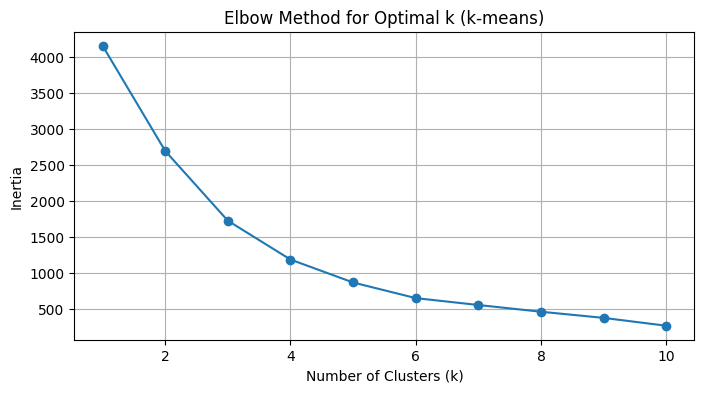

In [ ]:
# Define a range of possible cluster numbers (k)
k_range = range(1, 11)
inertia = []

# Calculate the sum of squared distances (inertia) for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to find the optimal k
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (k-means)')
plt.grid(True)
plt.show()

In [ ]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_g['Cluster'] = cluster_labels

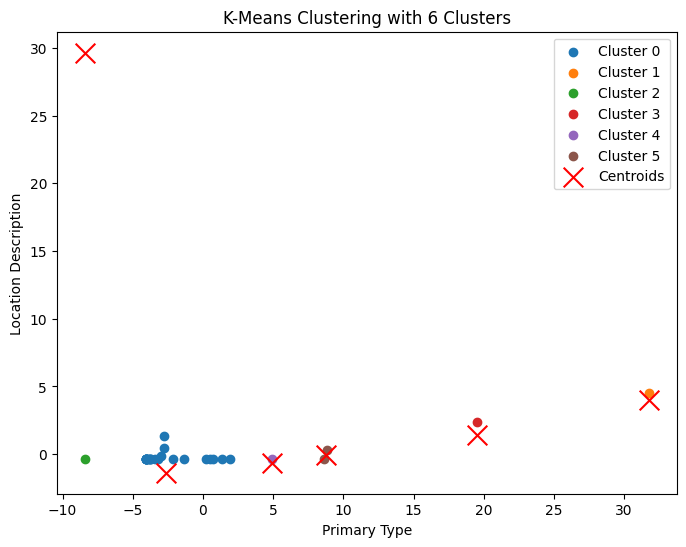

In [ ]:
# Plot the data points with cluster colors
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(pca_data[cluster_labels == i, 0], scaled_data[cluster_labels == i, 1], label=f'Cluster {i}')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')

plt.legend()
plt.title(f'K-Means Clustering with {k} Clusters')
plt.xlabel('Primary Type')
plt.ylabel('Location Description')
plt.show()

##Hierarchical Clustering

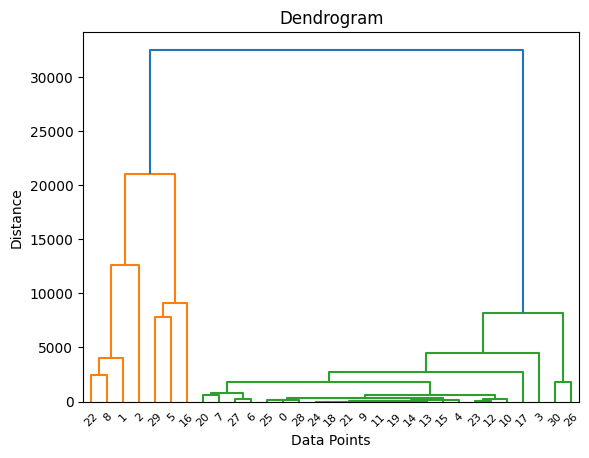

In [ ]:
# Perform hierarchical clustering
# Plot the dendrogram
linked = linkage(df_g, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

##PAM (Partition Among Medoids)

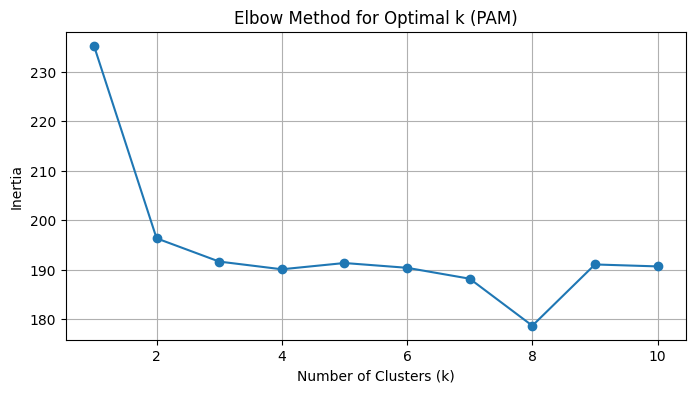

In [ ]:
# Perform PAM clustering (KMedoids) with the elbow method to determine the optimal number of clusters
k_range = range(1, 11)
inertia = []

for k in k_range:
    pam = KMedoids(n_clusters=k, random_state=0)
    pam.fit(pca_data)
    inertia.append(pam.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PAM)')
plt.grid(True)
plt.show()

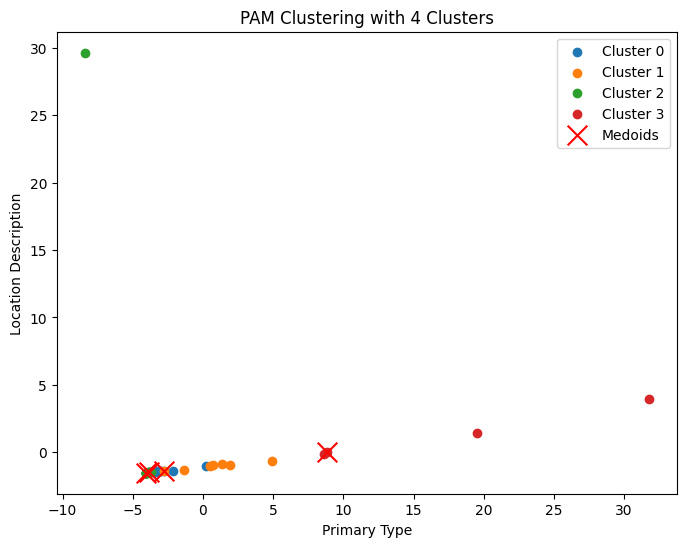

In [ ]:
# Choose the optimal number of clusters
k = 4
pam = KMedoids(n_clusters=k, random_state=0)
cluster_labels_pam = pam.fit_predict(pca_data)

# Plot the clustered data
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(pca_data[cluster_labels_pam == i, 0], pca_data[cluster_labels_pam == i, 1], label=f'Cluster {i}')

plt.scatter(pam.cluster_centers_[:, 0], pam.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Medoids')
plt.legend()
plt.title(f'PAM Clustering with {k} Clusters')
plt.xlabel('Primary Type')
plt.ylabel('Location Description')
plt.show()